# PROYECTO FINAL DE CURSO DE ANÁLISIS DE DATOS

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import tarfile
import urllib
import scipy
import seaborn as sns
import glob
from scipy.stats import spearmanr
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [ ]:
# Define la ruta y el patrón para encontrar tus archivos CSV
ruta_archivos = "\\data\\*.csv"

# Creamos la variable glob para obtener una lista de todos los archivos CSV
lista_archivos = glob.glob(ruta_archivos)

# Verifica que se hayan encontrado archivos
if not lista_archivos:
    print("No se encontraron archivos CSV en la ruta especificada.")
else:
    # Leer cada archivo CSV y almacenarlos en una lista
    lista_dataframes = [pd.read_csv(archivo) for archivo in lista_archivos]

    # Concatenar todos los DataFrames en uno solo
    df_literacy = pd.concat(lista_dataframes, ignore_index=True)

    # Especifica la ruta donde deseas guardar el archivo combinado
    archivo_salida = 'df_literacy.csv'

    # Guarda el DataFrame resultante en un nuevo archivo CSV
    df_literacy.to_csv(archivo_salida, index=False)

    print("Archivos CSV unidos con éxito en 'df_literacy.csv'")

Archivos CSV unidos con éxito en 'df_literacy.csv'


In [50]:
df_lit_transf = df_literacy.pivot_table(
    index=['geoUnit', 'year'], 
    columns='indicatorId', 
    values='value'
).reset_index()
df_lit_transf

indicatorId,geoUnit,year,20062,AIR.1.GLAST,CR.1.RUR,CR.1.RUR.F,CR.1.RUR.M,CR.1.URB,CR.1.URB.F,CR.1.URB.M,...,NY.GDP.MKTP.KD.ZG,SAP.1,SCHBSP.1.WCOMPUT,SCHBSP.1.WELEC,SCHBSP.1.WINTERN,SP.RUR.TOTL.ZS,XGDP.1.FSGOV,XGDP.2T3.FSGOV,XGDP.FSGOV,XUNIT.GDPCAP.1.FSGOV.FFNTR
0,EGY,2000,7947488.0,87.261482,75.500000,65.980000,84.140000,89.260000,90.540000,88.030000,...,6.37000,8919897.0,NaN,NaN,NaN,57.203,NaN,NaN,5.300000,NaN
1,EGY,2001,7856340.0,84.709770,NaN,NaN,NaN,NaN,NaN,NaN,...,3.53525,8867863.0,NaN,NaN,NaN,57.157,NaN,NaN,NaN,NaN
2,EGY,2002,7855433.0,83.074852,NaN,NaN,NaN,NaN,NaN,NaN,...,2.39020,8827019.0,NaN,NaN,NaN,57.111,NaN,NaN,4.795884,NaN
3,EGY,2003,7874308.0,83.297783,NaN,NaN,NaN,NaN,NaN,NaN,...,3.19345,8817720.0,NaN,NaN,NaN,57.065,NaN,NaN,4.945630,NaN
4,EGY,2004,7928380.0,84.497292,NaN,NaN,NaN,NaN,NaN,NaN,...,4.09207,8870401.0,NaN,NaN,NaN,57.019,NaN,NaN,4.670720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,SEN,2019,2171967.0,60.875580,34.515572,35.573269,33.478500,63.617619,68.520554,58.140469,...,4.61363,2608754.0,27.264820,44.097462,12.936290,52.347,1.61821,1.79676,5.035270,11.92131
93,SEN,2020,2259988.0,60.335941,NaN,NaN,NaN,NaN,NaN,NaN,...,1.34207,2661843.0,28.503469,45.694988,13.757020,51.878,1.65964,2.39805,5.686980,12.06998
94,SEN,2021,2269617.0,63.095669,NaN,NaN,NaN,NaN,NaN,NaN,...,6.54400,2699957.0,18.609659,48.662048,28.386980,51.400,1.74838,2.04912,5.612010,13.00081
95,SEN,2022,2321323.0,56.870270,NaN,NaN,NaN,NaN,NaN,NaN,...,3.82186,2724720.0,18.762510,50.873520,26.587811,50.914,1.90000,2.32666,5.987540,14.17349


In [51]:
#diccionario para renombrar las columnas existentes en el df y que sean más explicativas
some_dict = {'20062': 'Matriculación en primaria',
             'AIR.1.GLAST': '% ayuda internacional ED',
             'CR.1.RUR': '% pobl. rural acaba primaria',
             'CR.1.RUR.F': '% pobl. rural F acaba primaria',
             'CR.1.RUR.M': '% pobl. rural M acaba primaria',
             'CR.1.URB': '% pobl. urbana acaba primaria', 
             'CR.1.URB.F': '% pobl. urbana F acaba primaria',
             'CR.1.URB.M': '% pobl. urbana M acaba primaria',
             'EA.1T8.AG25T99' : 'ratio compl. primaria +25a',
             'ILLPOPF.AG15T99':'% F analfabetas',
             'ILLPOPF.AG15T99.RUR':'% F rural analfabetas',
             'LR.GALP.AG15T99': '% pobl. analfabeta',
             'NERT.1.CP': '% matriculación primaria',
             'NY.GDP.MKTP.CD': 'PIB(en $)',
             'NY.GDP.MKTP.KD.ZG':'% PIB crec.anual',
             'SAP.1': 'población en edad escolar',
             'SCHBSP.1.WCOMPUT': 'Esc. con PCs', 
             'SCHBSP.1.WELEC': 'Esc. con electricidad',
             'SCHBSP.1.WINTERN': 'Esc. con Internet',
             'SP.RUR.TOTL.ZS': '% pobl. rural',
             'XGDP.1.FSGOV': '% inversión PIB educ primaria',
             'XGDP.2T3.FSGOV':'% inversión PIB educ secundaria',
             'XGDP.FSGOV': '% inversión PIB educ.', 
             'XUNIT.GDPCAP.1.FSGOV.FFNTR': '% inv. PIB por alumno'
             }
 
#rename columns in DataFrame using dictionary
df_lit_transf.rename(columns=some_dict, inplace=True)

In [52]:
df_lit_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   geoUnit                          97 non-null     object 
 1   year                             97 non-null     int64  
 2   Matriculación en primaria        89 non-null     float64
 3   % ayuda internacional ED         68 non-null     float64
 4   % pobl. rural acaba primaria     34 non-null     float64
 5   % pobl. rural F acaba primaria   33 non-null     float64
 6   % pobl. rural M acaba primaria   33 non-null     float64
 7   % pobl. urbana acaba primaria    33 non-null     float64
 8   % pobl. urbana F acaba primaria  32 non-null     float64
 9   % pobl. urbana M acaba primaria  33 non-null     float64
 10  ratio compl. primaria +25a       36 non-null     float64
 11  % F analfabetas                  19 non-null     float64
 12  % F rural analfabetas   

In [53]:
df_lit_transf.isnull().sum()

indicatorId
geoUnit                             0
year                                0
Matriculación en primaria           8
% ayuda internacional ED           29
% pobl. rural acaba primaria       63
% pobl. rural F acaba primaria     64
% pobl. rural M acaba primaria     64
% pobl. urbana acaba primaria      64
% pobl. urbana F acaba primaria    65
% pobl. urbana M acaba primaria    64
ratio compl. primaria +25a         61
% F analfabetas                    78
% F rural analfabetas              83
% pobl. analfabeta                 94
% matriculación primaria           29
PIB(en $)                           1
% PIB crec.anual                    1
población en edad escolar           0
Esc. con PCs                       85
Esc. con electricidad              87
Esc. con Internet                  89
% pobl. rural                       1
% inversión PIB educ primaria      73
% inversión PIB educ secundaria    73
% inversión PIB educ.              13
% inv. PIB por alumno              76


In [54]:
df_lit_transf.describe()

indicatorId,year,Matriculación en primaria,% ayuda internacional ED,% pobl. rural acaba primaria,% pobl. rural F acaba primaria,% pobl. rural M acaba primaria,% pobl. urbana acaba primaria,% pobl. urbana F acaba primaria,% pobl. urbana M acaba primaria,ratio compl. primaria +25a,...,% PIB crec.anual,población en edad escolar,Esc. con PCs,Esc. con electricidad,Esc. con Internet,% pobl. rural,% inversión PIB educ primaria,% inversión PIB educ secundaria,% inversión PIB educ.,% inv. PIB por alumno
count,97.000000,8.900000e+01,68.000000,34.000000,33.000000,33.000000,33.000000,32.000000,33.000000,36.000000,...,96.000000,9.700000e+01,12.000000,10.000000,8.000000,96.000000,24.000000,24.000000,84.000000,21.000000
mean,2011.628866,1.031355e+07,63.559128,51.605933,51.485105,53.981913,75.154329,76.314474,74.981905,47.482093,...,4.863646,1.190513e+07,58.528637,53.567936,32.193563,58.704781,1.723237,1.388030,3.673808,11.536754
std,7.037577,8.665614e+06,18.812496,26.590732,26.480216,26.073903,18.451592,18.836014,17.877060,20.721333,...,2.749278,1.072202e+07,31.523540,25.889105,19.106138,6.064271,0.645681,0.541522,1.994966,3.930077
min,2000.000000,1.107712e+06,15.692990,4.345880,3.139900,5.439540,18.460939,17.330530,19.447689,10.850000,...,-1.794250,1.617319e+06,18.609659,28.983205,12.936290,45.717000,0.010960,0.018520,0.348517,0.081020
25%,2006.000000,2.340219e+06,52.028315,35.004179,36.410000,35.308910,64.680000,67.802992,63.158901,26.963330,...,3.124065,3.473744e+06,26.303885,35.017019,23.380113,55.574750,1.613980,0.968270,2.245127,10.722390
50%,2012.000000,7.656055e+06,60.404596,52.378815,49.403759,56.951488,77.927460,82.204926,77.687302,53.482891,...,4.628460,8.817720e+06,77.272865,47.178518,27.498675,57.209000,1.778520,1.362520,4.045055,12.912860
75%,2018.000000,1.506646e+07,83.130585,72.062113,66.148849,72.552612,89.416283,90.662321,88.964828,63.224211,...,6.588670,1.592622e+07,83.880953,52.788906,34.703740,62.714500,2.012488,1.800562,5.300000,14.173490
max,2024.000000,3.045558e+07,93.841400,97.073288,97.182198,96.968971,97.457832,97.421066,97.493462,89.327840,...,15.329160,3.729928e+07,94.729691,100.000000,71.276253,70.902000,2.972410,2.398050,6.857431,17.258511


Eliminamos las columnas que no nos interesan porque no vamos a utilizar esos datos y contienen valores nulos

In [55]:
df_lit_transf = df_lit_transf.drop(['% pobl. rural acaba primaria', '% pobl. urbana acaba primaria','% F analfabetas', '% F rural analfabetas', '% pobl. analfabeta', 'Esc. con PCs', 'Esc. con electricidad', 'Esc. con Internet','% inversión PIB educ primaria', '% inversión PIB educ secundaria', '% inv. PIB por alumno', '% ayuda internacional ED', '% pobl. rural F acaba primaria', '% pobl. rural M acaba primaria', '% pobl. urbana F acaba primaria',
       '% pobl. urbana M acaba primaria', 'ratio compl. primaria +25a'], axis='columns')

Observamos que existe un registro vacío con geoUnit 'EGY' que data de 2024 sin ningún dato. Eliminamos el registro ya que no contiene datos y el resto de países recogen datos hasta 2023. 

In [56]:
df_lit_transf.drop(df_lit_transf.index[24])

indicatorId,geoUnit,year,Matriculación en primaria,% matriculación primaria,PIB(en $),% PIB crec.anual,población en edad escolar,% pobl. rural,% inversión PIB educ.
0,EGY,2000,7947488.0,84.417992,9.983854e+10,6.37000,8919897.0,57.203,5.300000
1,EGY,2001,7856340.0,84.582230,9.668464e+10,3.53525,8867863.0,57.157,NaN
2,EGY,2002,7855433.0,85.053787,8.514607e+10,2.39020,8827019.0,57.111,4.795884
3,EGY,2003,7874308.0,85.744186,8.028846e+10,3.19345,8817720.0,57.065,4.945630
4,EGY,2004,7928380.0,86.287376,7.878247e+10,4.09207,8870401.0,57.019,4.670720
...,...,...,...,...,...,...,...,...,...
92,SEN,2019,2171967.0,75.325653,2.340400e+10,4.61363,2608754.0,52.347,5.035270
93,SEN,2020,2259988.0,77.074310,2.453051e+10,1.34207,2661843.0,51.878,5.686980
94,SEN,2021,2269617.0,75.106567,2.752078e+10,6.54400,2699957.0,51.400,5.612010
95,SEN,2022,2321323.0,75.073181,2.761948e+10,3.82186,2724720.0,50.914,5.987540


In [57]:
df_lit_transf.groupby(by=['geoUnit', 'year']).count()

indicatorId   Matriculación en primaria  % matriculación primaria  PIB(en $)  \
geoUnit year                                                                   
EGY     2000                          1                         1          1   
        2001                          1                         1          1   
        2002                          1                         1          1   
        2003                          1                         1          1   
        2004                          1                         1          1   
...                                 ...                       ...        ...   
SEN     2019                          1                         1          1   
        2020                          1                         1          1   
        2021                          1                         1          1   
        2022                          1                         1          1   
        2023                          1                         1          1   

indicatorId   % PIB crec.anual  población en edad escolar  % pobl. rural  \
geoUnit year                                                               
EGY     2000                 1                          1              1   
        2001                 1                          1              1   
        2002                 1                          1              1   
        2003                 1                          1              1   
        2004                 1                          1              1   
...                        ...                        ...            ...   
SEN     2019                 1                          1              1   
        2020                 1                          1              1   
        2021                 1                          1              1   
        2022                 1                          1              1   
        2023                 1                          1              1   

indicatorId   % inversión PIB educ.  
geoUnit year                         
EGY     2000                      1  
        2001                      0  
        2002                      1  
        2003                      1  
        2004                      1  
...                             ...  
SEN     2019                      1  
        2020                      1  
        2021                      1  
        2022                      1  
        2023                      1  

[97 rows x 7 columns]

Filtramos el dataframe por los años que vamos a utilizar

In [58]:
df_lit_transf = df_lit_transf[df_lit_transf['year'] < 2022]

Imputamos la inversión en educación de los registros faltantes.

In [59]:
df_lit_transf['% inversión PIB educ.'] = df_lit_transf.groupby('geoUnit')['% inversión PIB educ.'].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

Imputamos el número de matriculados según la evolución de los datos respecto a año anterior y año posterior

In [60]:
df_lit_transf['Matriculación en primaria'] = df_lit_transf.groupby('geoUnit')['Matriculación en primaria'].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

In [61]:
def calcular_porcentaje_matriculacion(df_lit_transf):
  
    mask = (df_lit_transf['% matriculación primaria'].isna()) & (~df_lit_transf['población en edad escolar'].isna()) & (~df_lit_transf['Matriculación en primaria'].isna())
    
    # Evitar división por cero
    poblacion_no_cero = df_lit_transf['población en edad escolar'] != 0
    mask = mask & poblacion_no_cero
    
    df_lit_transf.loc[mask, '% matriculación primaria'] = (df_lit_transf.loc[mask, 'Matriculación en primaria'] / df_lit_transf.loc[mask, 'población en edad escolar']) * 100
    
    return df_lit_transf

calcular_porcentaje_matriculacion(df_lit_transf)

indicatorId,geoUnit,year,Matriculación en primaria,% matriculación primaria,PIB(en $),% PIB crec.anual,población en edad escolar,% pobl. rural,% inversión PIB educ.
0,EGY,2000,7947488.0,84.417992,9.983854e+10,6.37000,8919897.0,57.203,5.300000
1,EGY,2001,7856340.0,84.582230,9.668464e+10,3.53525,8867863.0,57.157,5.047942
2,EGY,2002,7855433.0,85.053787,8.514607e+10,2.39020,8827019.0,57.111,4.795884
3,EGY,2003,7874308.0,85.744186,8.028846e+10,3.19345,8817720.0,57.065,4.945630
4,EGY,2004,7928380.0,86.287376,7.878247e+10,4.09207,8870401.0,57.019,4.670720
...,...,...,...,...,...,...,...,...,...
90,SEN,2017,2078228.5,84.051011,2.099656e+10,7.40749,2472580.0,53.260,4.740080
91,SEN,2018,2142227.0,84.215080,2.311670e+10,6.20924,2543757.0,52.808,5.110200
92,SEN,2019,2171967.0,75.325653,2.340400e+10,4.61363,2608754.0,52.347,5.035270
93,SEN,2020,2259988.0,77.074310,2.453051e+10,1.34207,2661843.0,51.878,5.686980


In [62]:
df_lit_transf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 0 to 94
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   geoUnit                    88 non-null     object 
 1   year                       88 non-null     int64  
 2   Matriculación en primaria  88 non-null     float64
 3   % matriculación primaria   88 non-null     float64
 4   PIB(en $)                  88 non-null     float64
 5   % PIB crec.anual           88 non-null     float64
 6   población en edad escolar  88 non-null     float64
 7   % pobl. rural              88 non-null     float64
 8   % inversión PIB educ.      88 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 6.9+ KB


Guardamos el dataset con el que vamos a trabajar en .csv para gestionarlo desde PowerBI

In [63]:
archivo_output = 'df_education.csv'
df_lit_transf.to_csv(archivo_output, index=False)

Empezamos a graficar las diferentes variables numéricas para observar la distribución de los datos.

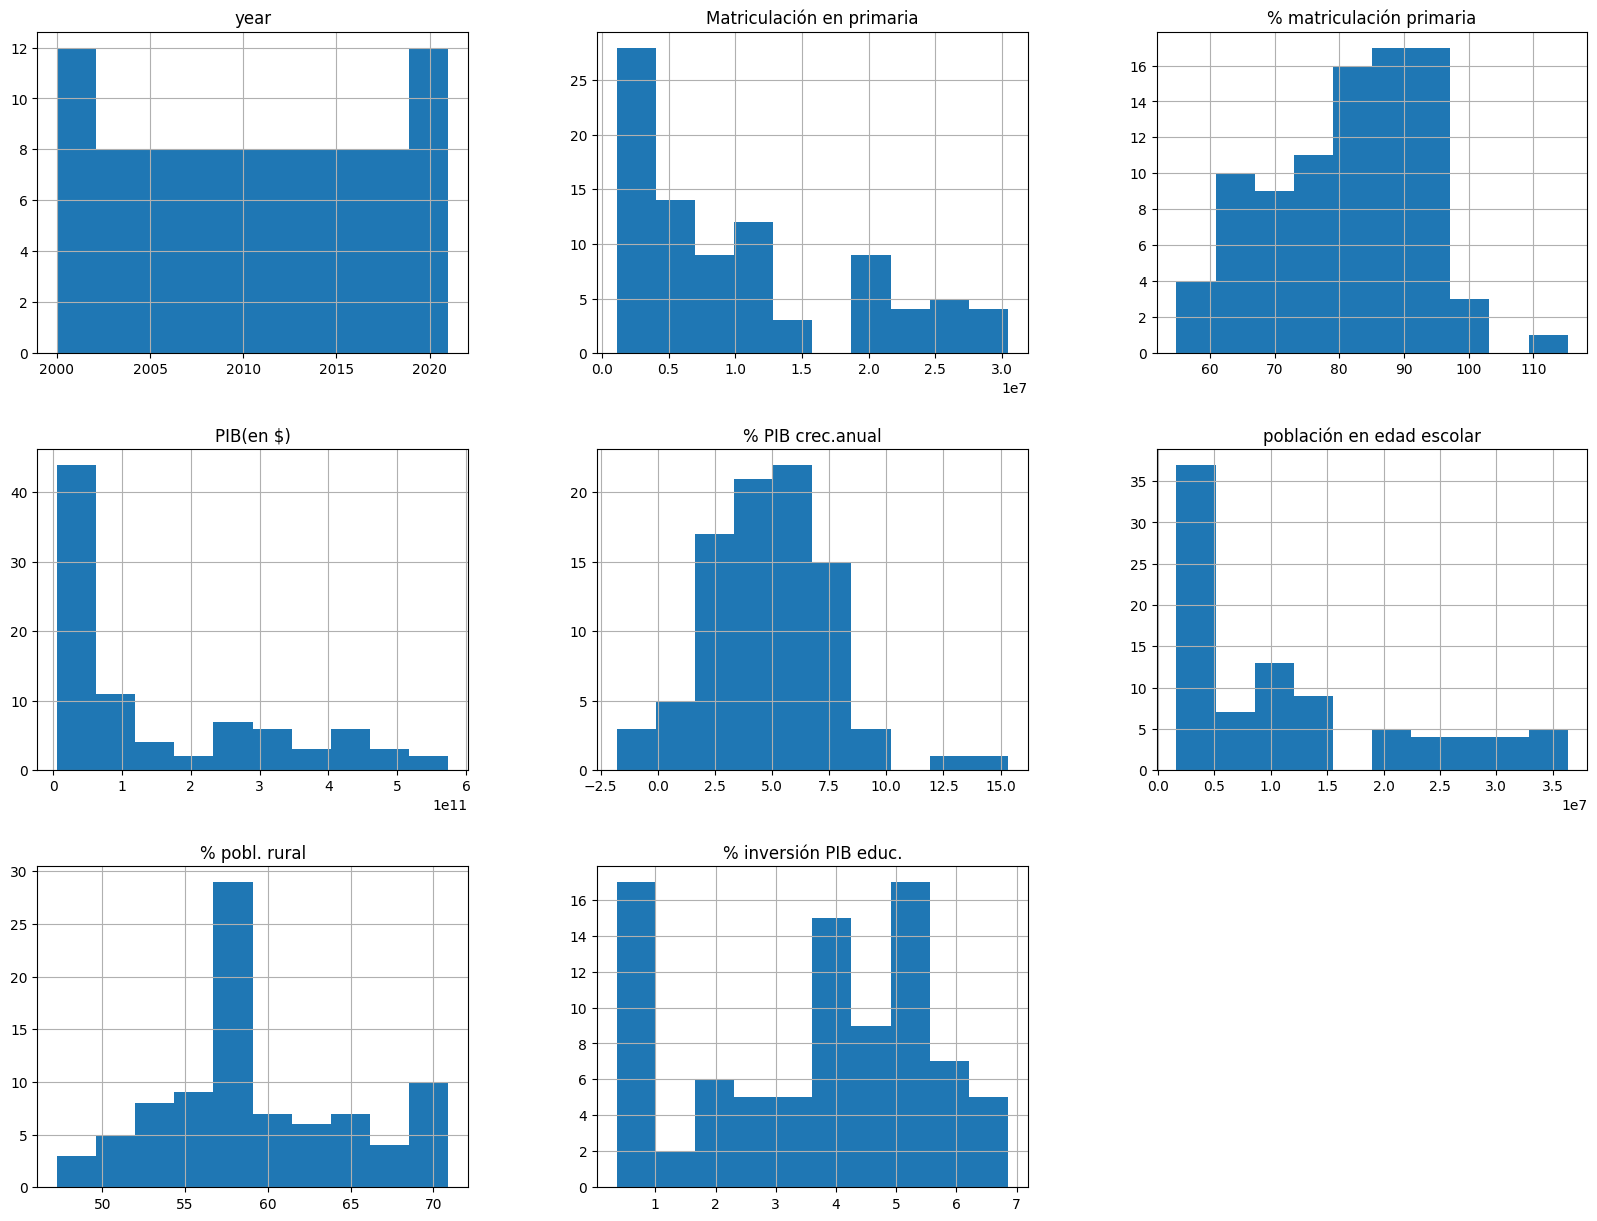

In [64]:
df_lit_transf.hist(figsize=(20,15))
plt.show()

## BLOQUE 1: INVERSIÓN EN EDUCACIÓN

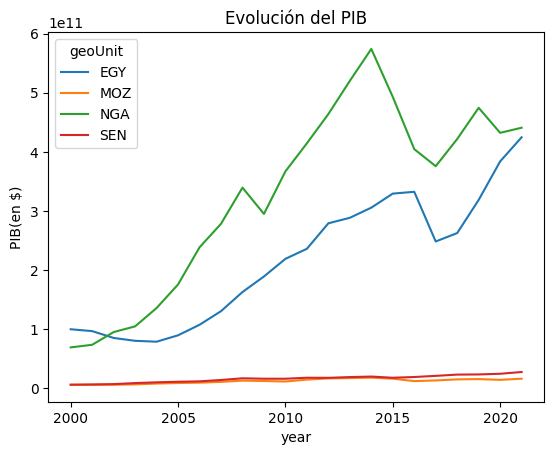

In [65]:
sns.lineplot(data=df_lit_transf, x='year', y='PIB(en $)', hue='geoUnit')
plt.title('Evolución del PIB')
plt.show()

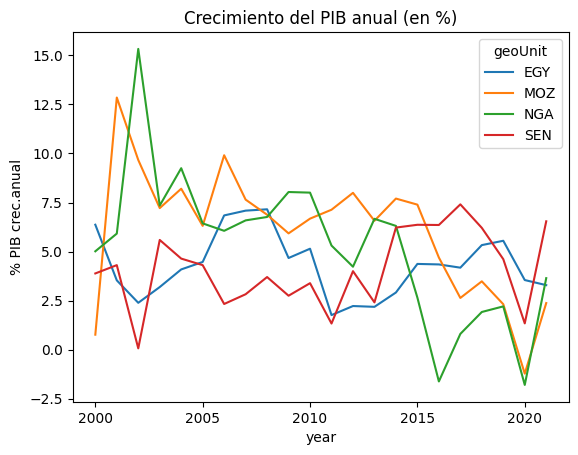

In [66]:
sns.lineplot(data=df_lit_transf, x='year', y='% PIB crec.anual', hue='geoUnit')
plt.title('Crecimiento del PIB anual (en %)')
plt.show()

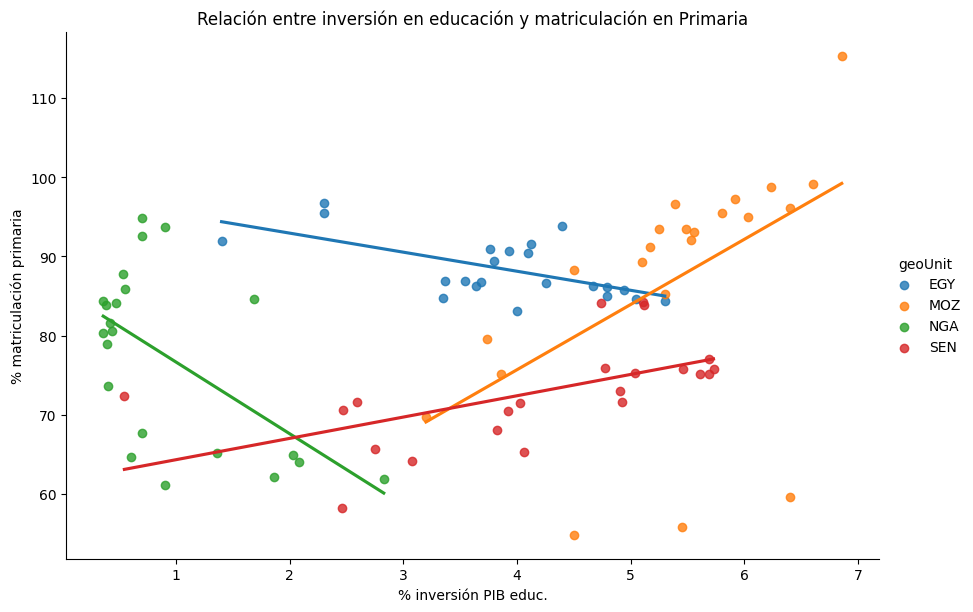

In [67]:
sns.lmplot(data=df_lit_transf, x='% inversión PIB educ.', y='% matriculación primaria', 
           hue='geoUnit', height=6, aspect=1.5, ci=None)
plt.title('Relación entre inversión en educación y matriculación en Primaria')
plt.show()

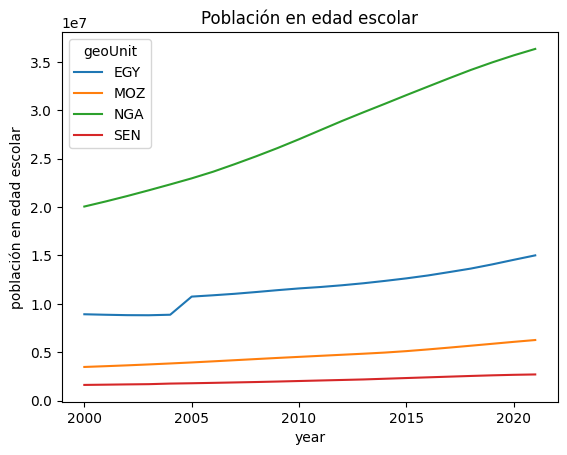

In [68]:
sns.lineplot(data=df_lit_transf, x='year', y='población en edad escolar', hue='geoUnit')
plt.title('Población en edad escolar')
plt.show()

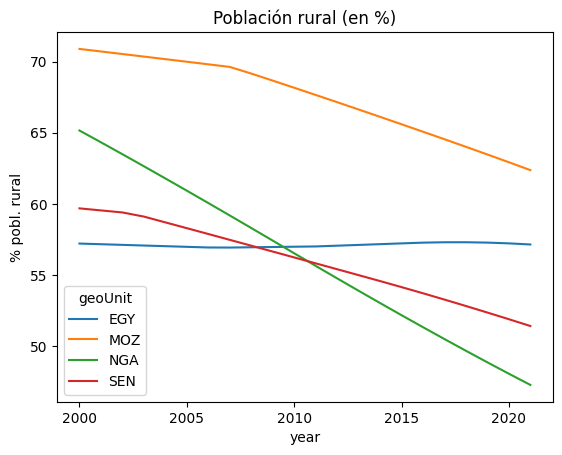

In [69]:
sns.lineplot(data=df_lit_transf, x='year', y='% pobl. rural', hue='geoUnit')
plt.title('Población rural (en %)')
plt.show()

Convertimos la variable 'year' a variable categórica. 

In [70]:
df_lit_transf['year'] = df_lit_transf['year'].astype(str)

Matriz de correlación de Spearman: no hay una distribución normal de los datos.

In [71]:
corr_matrix = df_lit_transf.corr(method='spearman', numeric_only=True)
print(corr_matrix)

indicatorId                Matriculación en primaria  \
indicatorId                                            
Matriculación en primaria                   1.000000   
% matriculación primaria                    0.249199   
PIB(en $)                                   0.852488   
% PIB crec.anual                           -0.005865   
población en edad escolar                   0.998697   
% pobl. rural                              -0.248036   
% inversión PIB educ.                      -0.579500   

indicatorId                % matriculación primaria  PIB(en $)  \
indicatorId                                                      
Matriculación en primaria                  0.249199   0.852488   
% matriculación primaria                   1.000000   0.163238   
PIB(en $)                                  0.163238   1.000000   
% PIB crec.anual                          -0.022613  -0.157726   
población en edad escolar                  0.244356   0.854232   
% pobl. rural                    

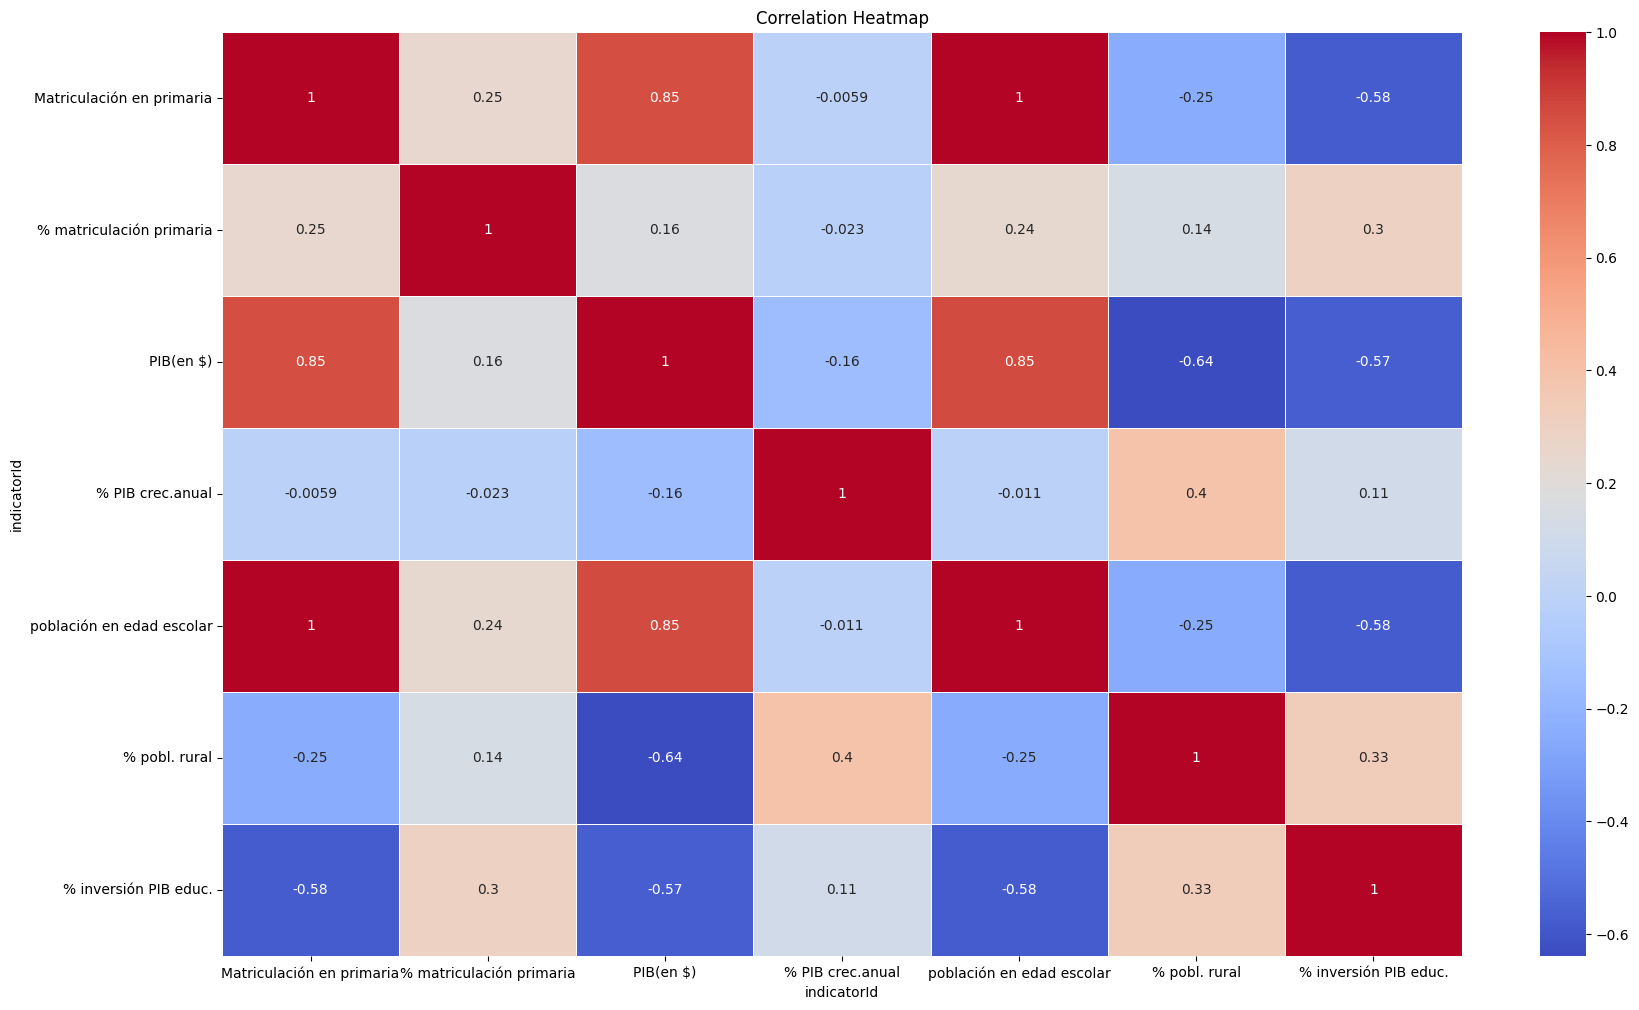

In [72]:
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.7)
plt.title('Correlation Heatmap')
plt.show() 

Filtramos valores extremos (ej: fuera de 0-100%)

In [73]:
df_model= df_lit_transf[(df_lit_transf['% matriculación primaria'] >= 0) & (df_lit_transf['% matriculación primaria'] <= 100)]

Determinamos las variables de estudio y target

In [74]:
features = ['PIB(en $)', '% PIB crec.anual', '% pobl. rural', '% inversión PIB educ.']
target = '% matriculación primaria'
paises = df_model['geoUnit'].unique()

Buscamos los outliers de las diferentes variables para determinar el escalado de datos que vamos a necesitar al realizar la regresión lineal. 

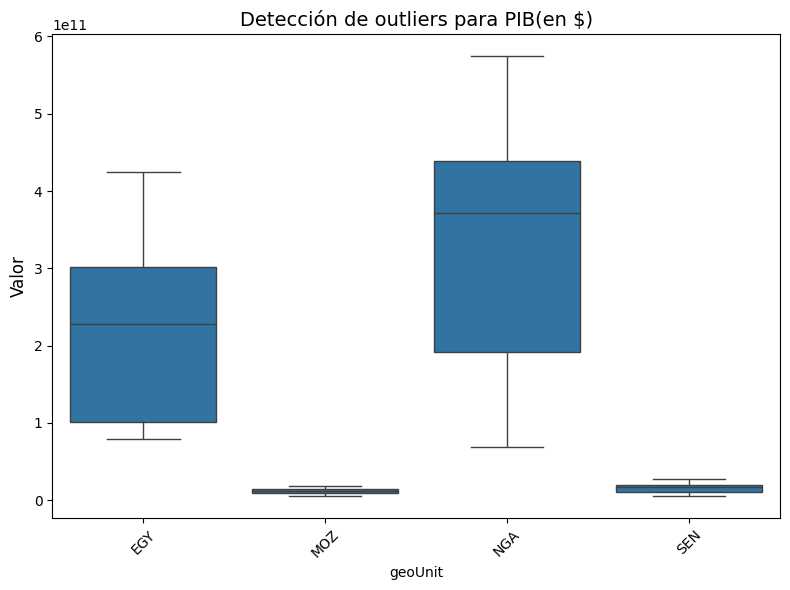

In [75]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_model, x='geoUnit', y='PIB(en $)', orient='v')
plt.title('Detección de outliers para PIB(en $)', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Valor', fontsize=12)
plt.tight_layout()
plt.show()

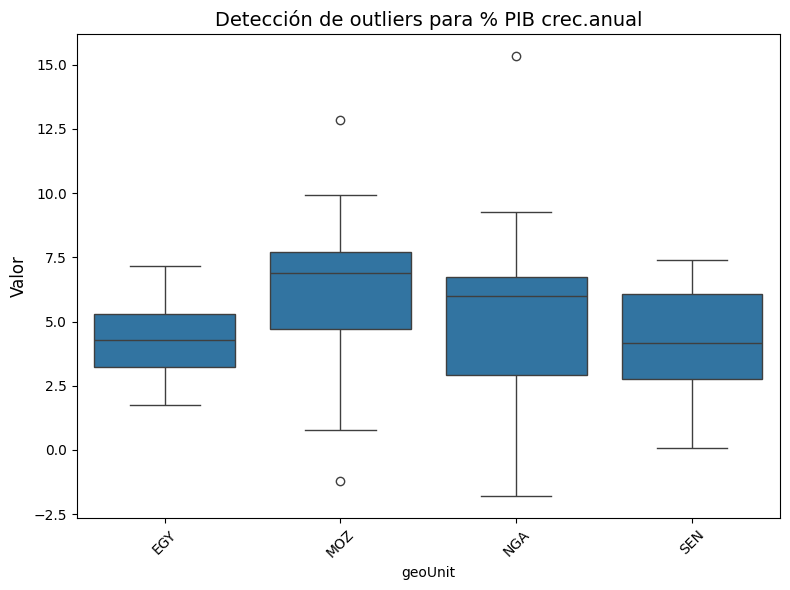

In [76]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_model, x='geoUnit', y='% PIB crec.anual', orient='v')  # 'orient="h"' para horizontal
plt.title('Detección de outliers para % PIB crec.anual', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Valor', fontsize=12)
plt.tight_layout()
plt.show()

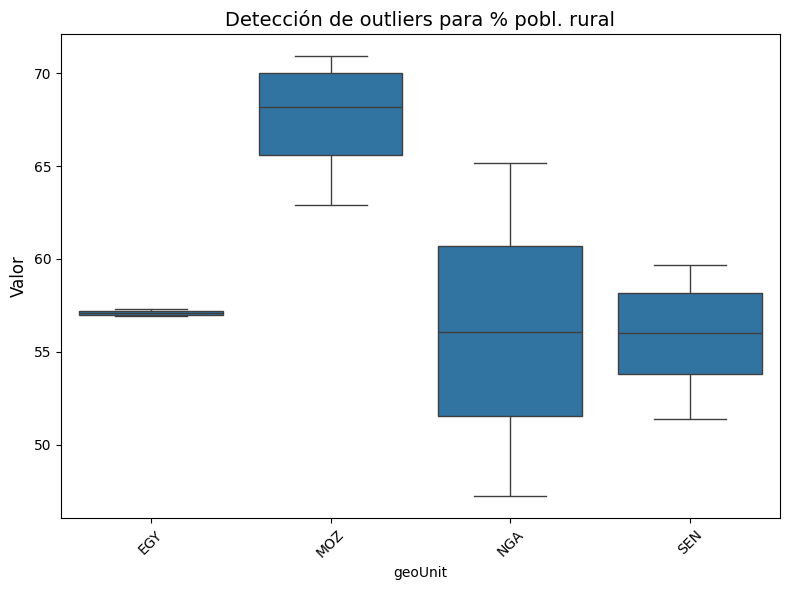

In [77]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_model, x='geoUnit', y='% pobl. rural', orient='v')  # 'orient="h"' para horizontal
plt.title('Detección de outliers para % pobl. rural', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Valor', fontsize=12)
plt.tight_layout()
plt.show()

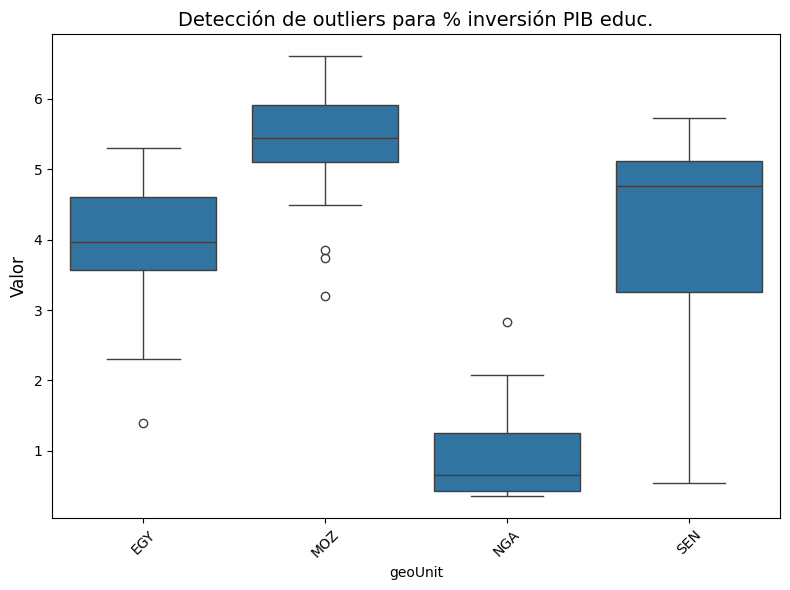

In [78]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_model, x='geoUnit', y='% inversión PIB educ.', orient='v')
plt.title('Detección de outliers para % inversión PIB educ.', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Valor', fontsize=12)
plt.tight_layout()
plt.show()

Observamos los outliers en la variable target por país

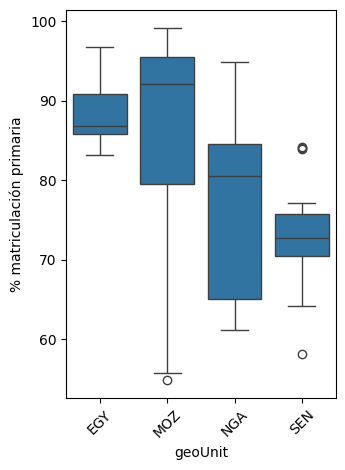

In [79]:
plt.subplot(122)
sns.boxplot(x='geoUnit', y='% matriculación primaria', data=df_model)
plt.xticks(rotation=45)
plt.tight_layout()

In [80]:
df_model['year'] = df_model['year'].astype(int)

C:\Users\Cristina\AppData\Local\Temp\ipykernel_4580\3074126005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['year'] = df_model['year'].astype(int)


Ajustamos la variable 'year' según ordinalidad

In [81]:
pd.factorize(df_model['year'])[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21], dtype=int64)

In [82]:
# Proyecciones para 2030
def calcular_proyecciones(df, pais):
    df_pais = df_model[df_model['geoUnit'] == pais]
    proyeccion = {'geoUnit': pais}
    
    for feature in features:
        if feature in ['PIB(en $)', 'población en edad escolar']:
            val_2000 = df_pais[df_pais['year'] == 2000][feature].values[0]
            val_2020 = df_pais[df_pais['year'] == 2020][feature].values[0]
            tasa = (val_2020/val_2000)**(1/20) - 1
            proyeccion[feature] = val_2020 * (1 + tasa)**10
            
        elif feature == '% pobl. rural':
            years = df_pais['year'].values.reshape(-1, 1)
            vals = df_pais[feature].values
            model = LinearRegression().fit(years, vals)
            proyeccion[feature] = model.predict([[2030]])[0].clip(0, 100)
            
            
        else:
            proyeccion[feature] = df_pais[df_pais['year'] >= 2015][feature].mean()
    
    return proyeccion

proyecciones_2030 = pd.DataFrame([calcular_proyecciones(df_model, pais) for pais in paises])

In [83]:
print(proyecciones_2030)

  geoUnit     PIB(en $)  % PIB crec.anual  % pobl. rural  \
0     EGY  7.525556e+11          4.374841      57.303726   
1     MOZ  2.205479e+10          3.218585      59.387589   
2     NGA  1.080344e+12          1.117977      39.314096   
3     SEN  4.954589e+10          5.548506      47.958519   

   % inversión PIB educ.  
0               3.175835  
1               5.905834  
2               0.392341  
3               5.250573  


## MODELOS DE MACHINE LEARNING 

## MODELO REGRESIÓN LINEAL

Como hemos detectado que la variable '% PIB crec. anual' presenta outliers vamos a  utilizar dos tipos de Scaler diferente en función de las columnas. Usaremos el RobustScaler para las columnas con outliers y el MinMax Scaler para las columnas sin outliers.

In [84]:
columnas_con_outliers = ['% PIB crec.anual', '% inversión PIB educ.'] 
columnas_sin_outliers = ['PIB(en $)', '% pobl. rural']

preprocessor = ColumnTransformer(
    transformers=[
        ('robust', RobustScaler(), columnas_con_outliers),
        ('minmax', MinMaxScaler(), columnas_sin_outliers)
    ],
    remainder='passthrough'
)

In [85]:
resultados = []

for pais in paises:

    df_pais = df_model[df_model['geoUnit'] == pais].sort_values('year')
    train = df_pais[df_pais['year'] < 2018]
    test = df_pais[df_pais['year'] >= 2018]          
    X_train, y_train = train[features], train[target]
    X_test, y_test = test[features], test[target]
        
    
    model_regl = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
    
    model_regl.fit(X_train, y_train)
    y_pred = model_regl.predict(X_test)
    test_r2 = r2_score(y_test, y_pred) if len(y_test) > 0 else np.nan
    X_2030 = proyecciones_2030[proyecciones_2030['geoUnit'] == pais][features]
    prediccion_2030 = model_regl.predict(X_2030)[0]

    resultados.append({
            'País': pais,
            'Predicción 2030 (%)': round(prediccion_2030, 2),
            'Valor 2020 (%)': round(df_pais[df_pais['year'] == 2020][target].values[0], 2),
            'Y_pred_test': y_pred,
            'Test_years': test['year'].values,
            'R² (test)': round(test_r2, 2)
            })

# Resultados finales
resultados_regl_df = pd.DataFrame(resultados)
print(resultados_regl_df.to_string(index=False))

País  Predicción 2030 (%)  Valor 2020 (%)                                                                  Y_pred_test               Test_years  R² (test)
 EGY                98.83           95.52 [86.99188358173369, 90.58688937953195, 89.70716735874525, 90.52307187514987] [2018, 2019, 2020, 2021]      -7.03
 MOZ               128.58           99.18                  [101.99511262310287, 101.56366341659104, 98.11434473293077]       [2018, 2019, 2020]      -8.87
 NGA                81.09           84.37 [76.60272270742487, 77.77180903598644, 74.15556813896005, 76.63173859499875] [2018, 2019, 2020, 2021]     -16.64
 SEN                87.08           77.07 [82.21801999516417, 84.85057212632407, 87.44642456804142, 85.28414775745347] [2018, 2019, 2020, 2021]      -4.56


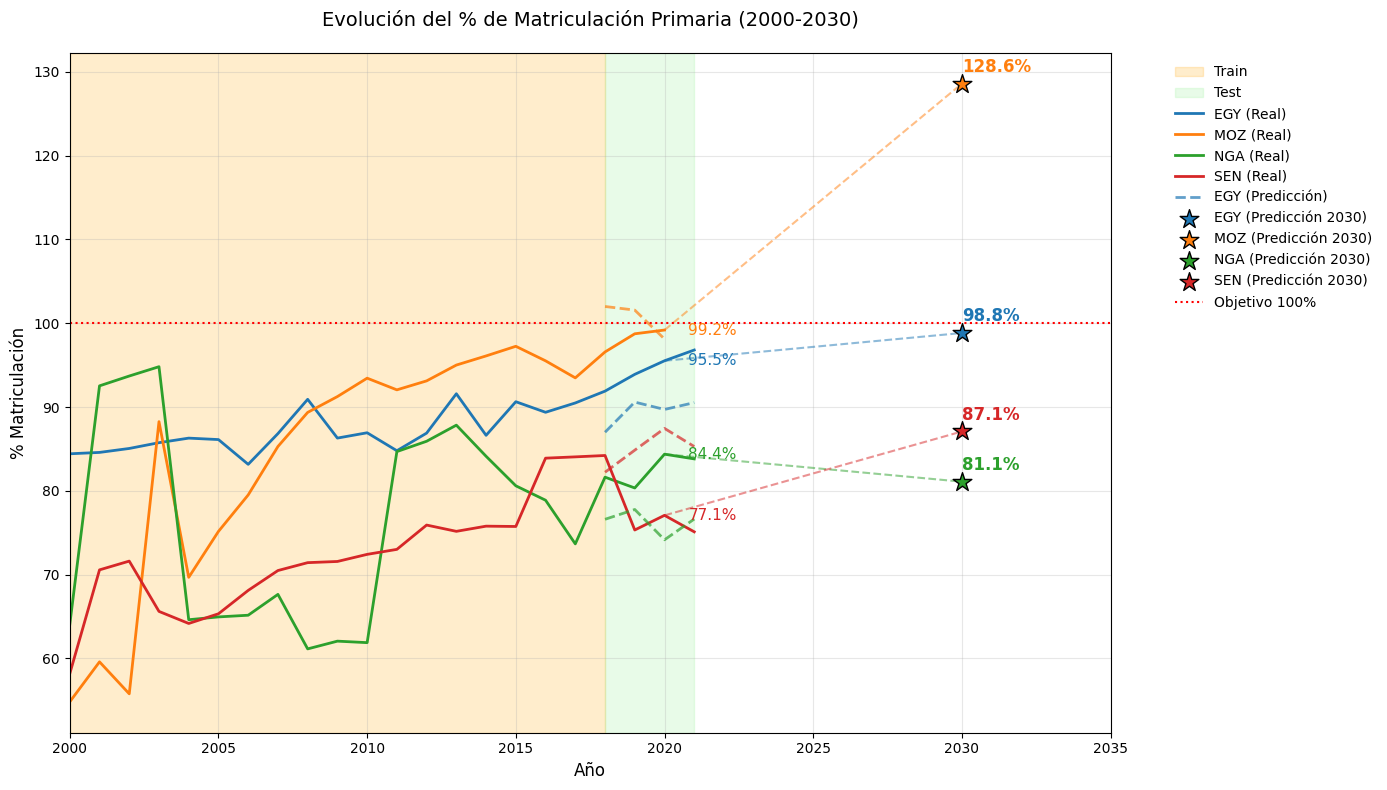

In [86]:
plt.figure(figsize=(14, 8))
x_offset = 0.8

colors = sns.color_palette("tab10", len(paises))
ax = plt.gca() 
ax.axvspan(2000, 2018, color='orange', alpha=0.2, label='Train')
ax.axvspan(2018, 2021, color='lightgreen', alpha=0.2, label='Test')

# Datos históricos (2000-2020)
for i, pais in enumerate(paises):
    df_pais = df_model[df_model['geoUnit'] == pais]
    plt.plot(df_pais['year'], 
             df_pais[target], 
             color=colors[i],
             linestyle='-',
             linewidth=2,
             markersize=8,
             label=f'{pais} (Real)')
    
# Predicciones en test
for i, pais in enumerate(paises):
    test_years = resultados_regl_df[resultados_regl_df['País'] == pais]['Test_years'].iloc[0]
    y_pred = resultados_regl_df[resultados_regl_df['País'] == pais]['Y_pred_test'].iloc[0]
    
    plt.plot(test_years, y_pred,
             color=colors[i], linestyle='--', linewidth=2,
             alpha=0.7, label=f'{pais} (Predicción)' if i == 0 else "")

# Proyecciones 2030 (destacadas con estrellas)
for i, pais in enumerate(paises):
    pred_2030 = resultados_regl_df[resultados_regl_df['País'] == pais]['Predicción 2030 (%)'].values[0]
    plt.scatter(2030, 
                pred_2030, 
                color=colors[i],
                marker='*', 
                s=200,
                edgecolor='black',
                linewidth=1,
                zorder=10,
                label=f'{pais} (Predicción 2030)')

# Líneas de conexión (2020 → 2030)
for i, pais in enumerate(paises):
    valor_2020 = resultados_regl_df[resultados_regl_df['País'] == pais]['Valor 2020 (%)'].values[0]
    pred_2030 = resultados_regl_df[resultados_regl_df['País'] == pais]['Predicción 2030 (%)'].values[0]
    plt.plot([2020, 2030], 
             [valor_2020, pred_2030], 
             color=colors[i],
             linestyle='--',
             alpha=0.5)


plt.axhline(100, color='red', linestyle=':', label='Objetivo 100%')
plt.title('Evolución del % de Matriculación Primaria (2000-2030)', fontsize=14, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('% Matriculación', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), frameon=False)
plt.grid(True, alpha=0.3)
plt.xlim(2000, 2035)

# Etiquetas de valores en 2020 y 2030
for i, pais in enumerate(paises):
    # Etiqueta 2020
    valor_2020 = resultados_regl_df[resultados_regl_df['País'] == pais]['Valor 2020 (%)'].values[0]
    plt.text(2020 + x_offset, valor_2020, f'{valor_2020:.1f}%', 
             ha='left', va='center', color=colors[i], fontsize=11)
    
    # Etiqueta 2030
    pred_2030 = resultados_regl_df[resultados_regl_df['País'] == pais]['Predicción 2030 (%)'].values[0]
    plt.text(2030, pred_2030 + 2, f'{pred_2030:.1f}%', 
             ha='left', va='center',color=colors[i], fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

## MODELO DECISION TREE

In [87]:
params_arbol = {'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.7, 'random_state': 42, 'ccp_alpha': 0.01 }

resultados_arbol = []

for pais in paises:

        df_pais = df_model[df_model['geoUnit'] == pais].sort_values('year')
        train = df_pais[df_pais['year'] <= 2018]
        test = df_pais[df_pais['year'] > 2018]          
        X_train, y_train = train[features], train[target]
        X_test, y_test = test[features], test[target]
        
        arbol = DecisionTreeRegressor(**params_arbol)
        arbol.fit(X_train, y_train)
    
        y_pred = arbol.predict(X_test)
        test_r2 = r2_score(y_test, y_pred) if len(y_test) > 0 else np.nan
        X_2030 = proyecciones_2030[proyecciones_2030['geoUnit'] == pais][features]
        prediccion_2030 = arbol.predict(X_2030)[0]

        resultados_arbol.append({
            'País': pais,
            'Predicción 2030 (%)': round(prediccion_2030, 2),
            'Valor 2020 (%)': round(df_pais[df_pais['year'] == 2020][target].values[0], 2),
            'Y_pred_test': y_pred,
            'Test_years': test['year'].values,
            'R² (test)': round(test_r2, 2)
            })


# DataFrame con los resultados finales
resultados_arbol_df = pd.DataFrame(resultados_arbol)
print(resultados_arbol_df)

  País  Predicción 2030 (%)  Valor 2020 (%)  \
0  EGY                89.64           95.52   
1  MOZ                95.96           99.18   
2  NGA                83.38           84.37   
3  SEN                79.25           77.07   

                                         Y_pred_test          Test_years  \
0  [89.63853963970746, 89.63853963970746, 89.6385...  [2019, 2020, 2021]   
1             [95.96424102783203, 95.96424102783203]        [2019, 2020]   
2  [83.37902800744148, 83.37902800744148, 83.3790...  [2019, 2020, 2021]   
3  [79.25282016768189, 79.25282016768189, 79.2528...  [2019, 2020, 2021]   

   R² (test)  
0     -23.59  
1    -179.52  
2      -0.09  
3     -15.06  


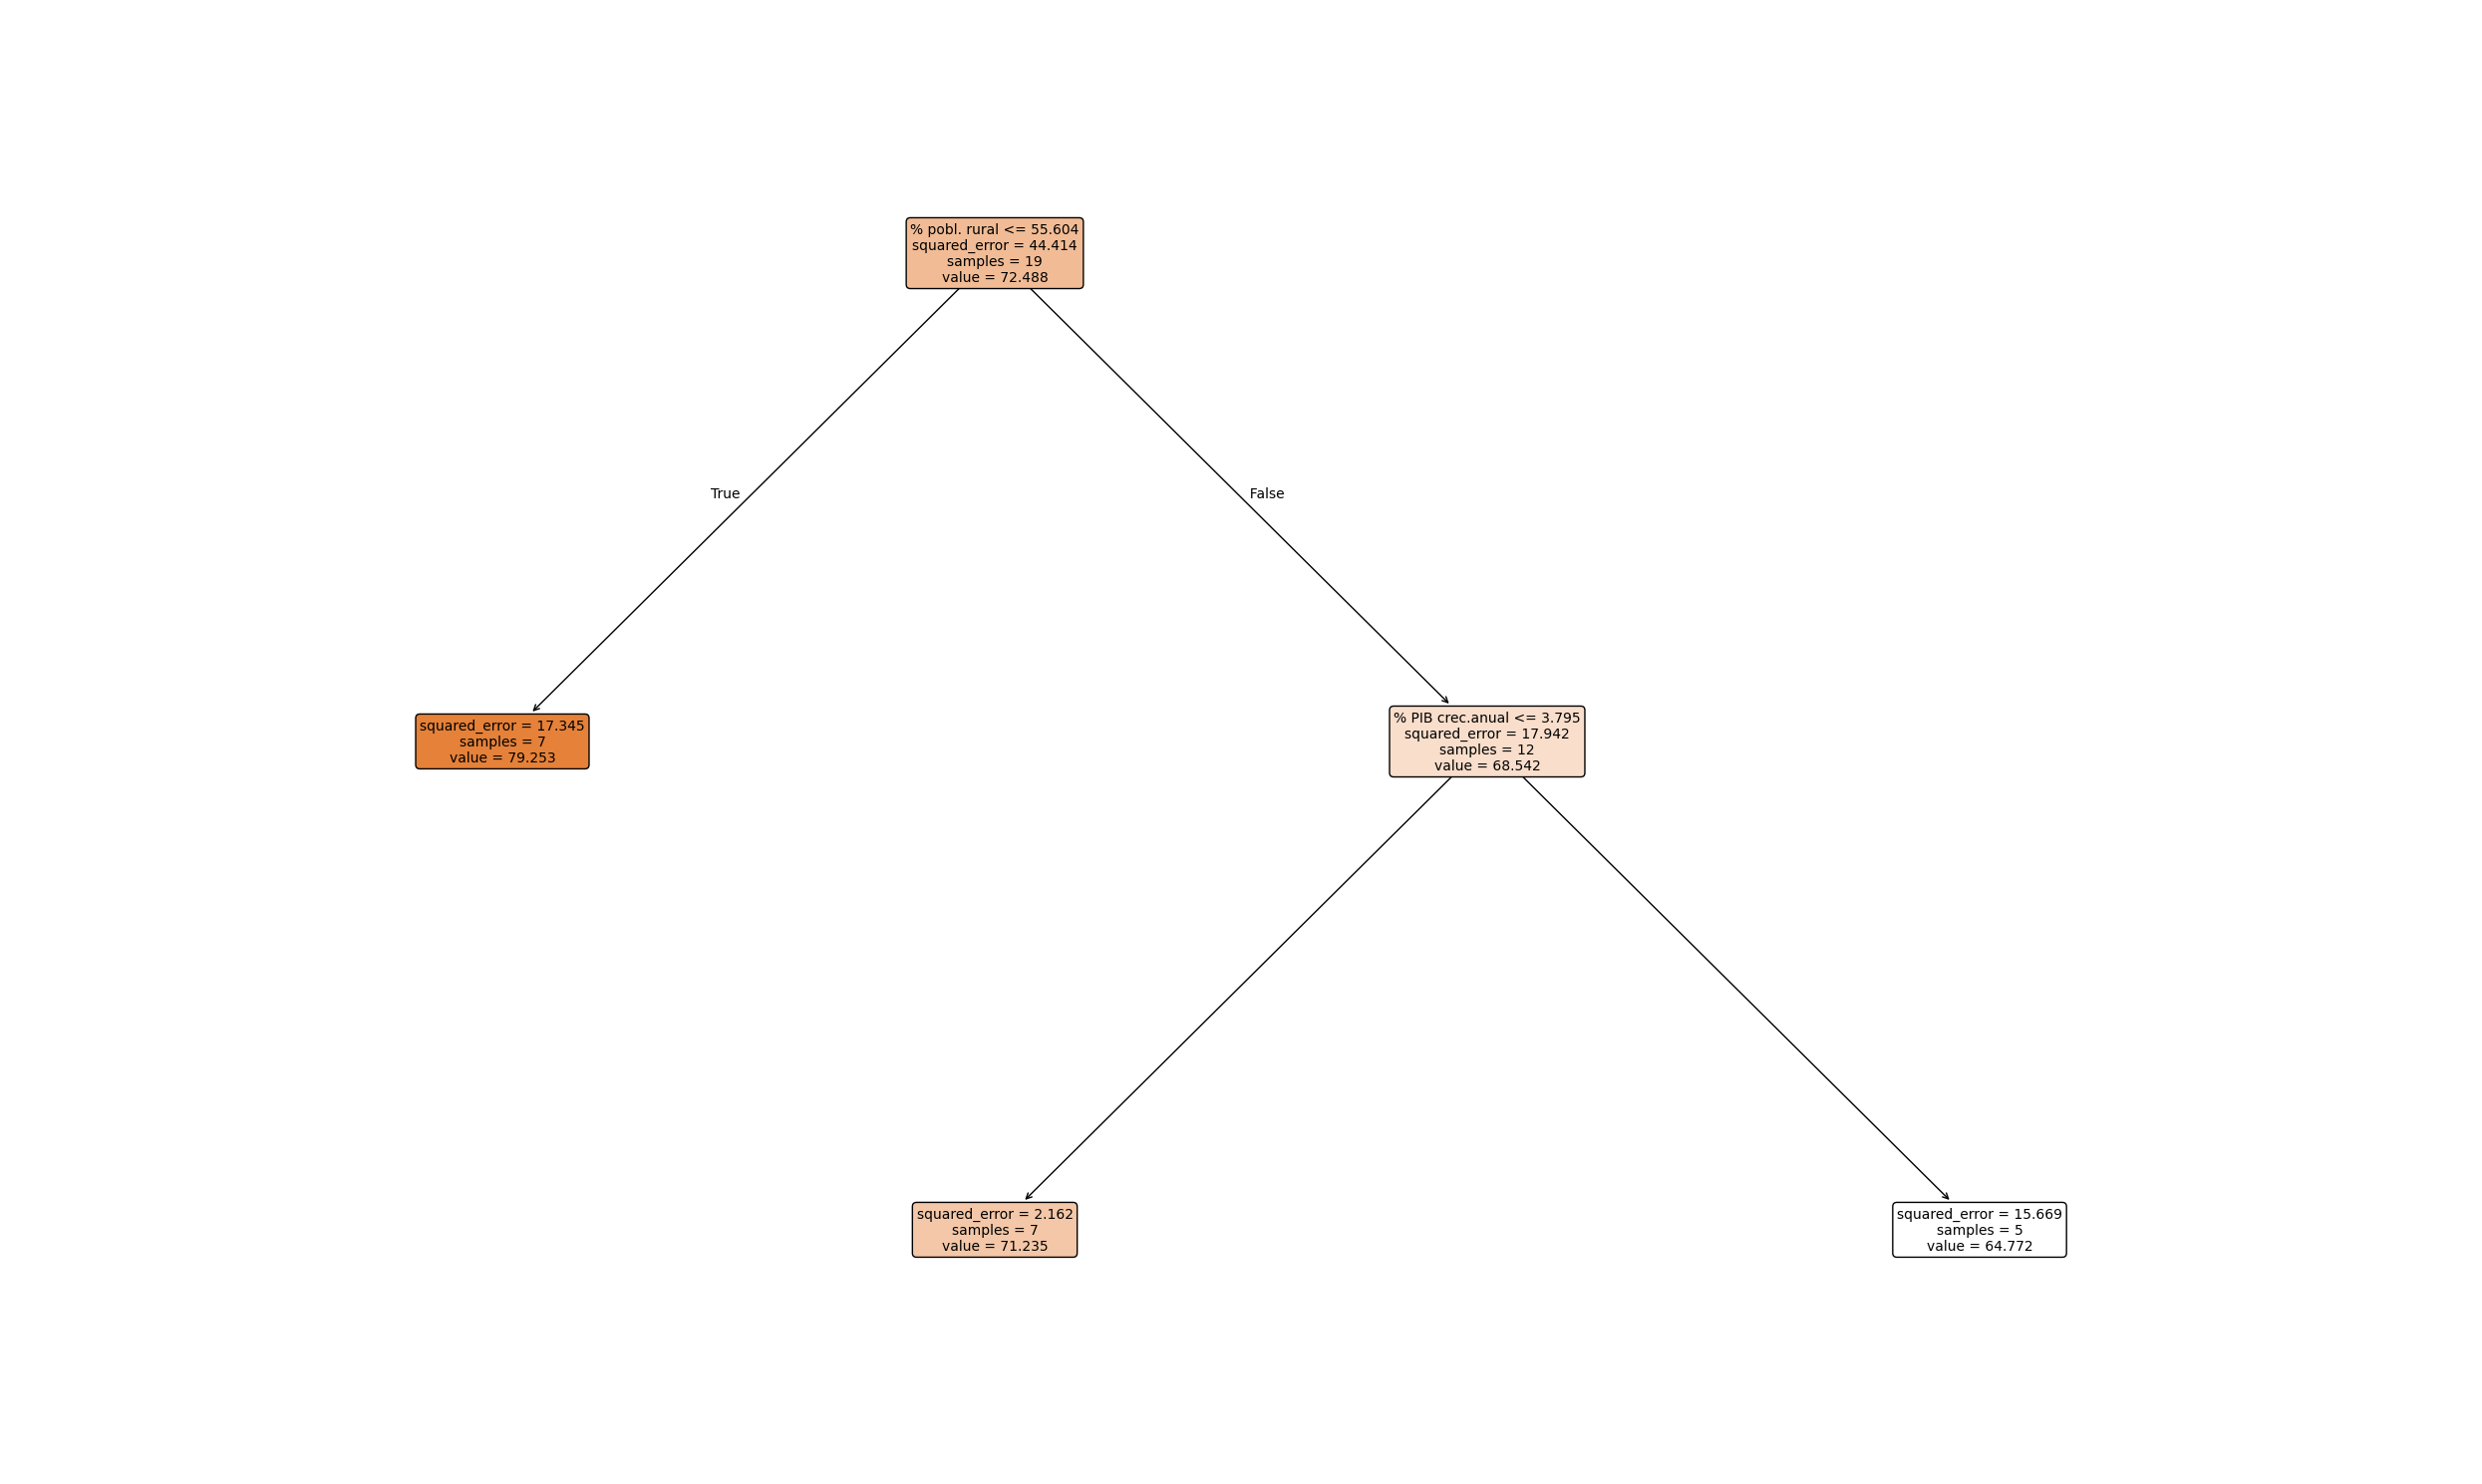

In [88]:
# Gráfico del arbol de decisión

plt.figure(figsize=(25, 15)) 
plot_tree(arbol, 
          feature_names=features, 
          class_names=True, 
          filled=True,
          fontsize=10,  
          rounded=True)
plt.tight_layout() 
plt.show()

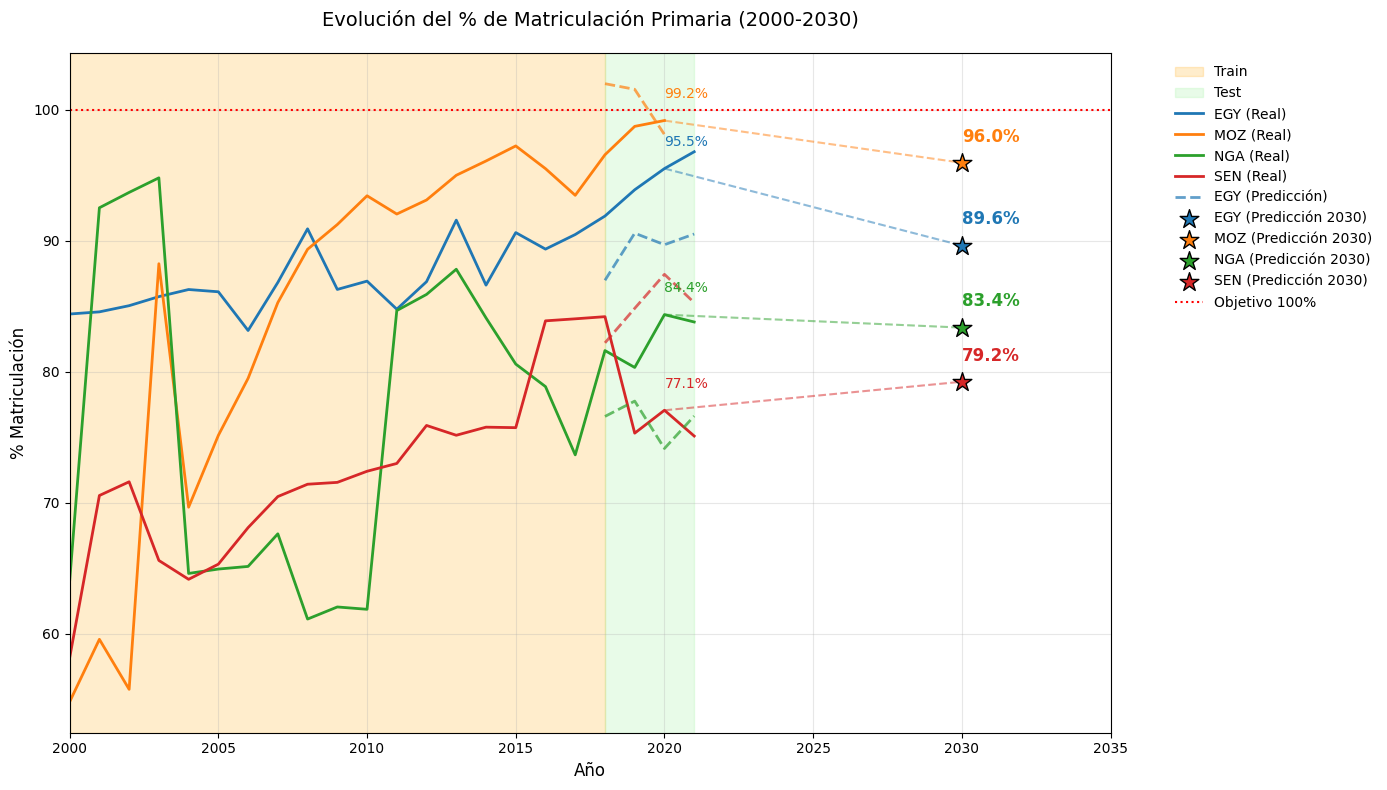

In [89]:
plt.figure(figsize=(14, 8))

colors = sns.color_palette("tab10", len(paises))
ax = plt.gca() 
ax.axvspan(2000, 2018, color='orange', alpha=0.2, label='Train')
ax.axvspan(2018, 2021, color='lightgreen', alpha=0.2, label='Test')

# Datos históricos (2000-2020)
for i, pais in enumerate(paises):
    df_pais = df_model[df_model['geoUnit'] == pais]
    plt.plot(df_pais['year'], 
             df_pais[target], 
             color=colors[i],
             linestyle='-',
             linewidth=2,
             markersize=8,
             label=f'{pais} (Real)')
    
# Predicciones en test
for i, pais in enumerate(paises):
    test_years = resultados_regl_df[resultados_regl_df['País'] == pais]['Test_years'].iloc[0]
    y_pred = resultados_regl_df[resultados_regl_df['País'] == pais]['Y_pred_test'].iloc[0]
    
    plt.plot(test_years, y_pred,
             color=colors[i], linestyle='--', linewidth=2,
             alpha=0.7, label=f'{pais} (Predicción)' if i == 0 else "")

# Proyecciones 2030 (destacadas con estrellas)
for i, pais in enumerate(paises):
    pred_2030 = resultados_arbol_df[resultados_arbol_df['País'] == pais]['Predicción 2030 (%)'].values[0]
    plt.scatter(2030, 
                pred_2030, 
                color=colors[i],
                marker='*', 
                s=200,
                edgecolor='black',
                linewidth=1,
                zorder=10,
                label=f'{pais} (Predicción 2030)')

# Líneas de conexión (2020 → 2030)
for i, pais in enumerate(paises):
    valor_2020 = resultados_arbol_df[resultados_arbol_df['País'] == pais]['Valor 2020 (%)'].values[0]
    pred_2030 = resultados_arbol_df[resultados_arbol_df['País'] == pais]['Predicción 2030 (%)'].values[0]
    plt.plot([2020, 2030], 
             [valor_2020, pred_2030], 
             color=colors[i],
             linestyle='--',
             alpha=0.5)


plt.axhline(100, color='red', linestyle=':', label='Objetivo 100%')
plt.title('Evolución del % de Matriculación Primaria (2000-2030)', fontsize=14, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('% Matriculación', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), frameon=False)
plt.grid(True, alpha=0.3)
plt.xlim(2000, 2035)

# Etiquetas de valores en 2020 y 2030
for i, pais in enumerate(paises):
    # Etiqueta 2020
    valor_2020 = resultados_arbol_df[resultados_arbol_df['País'] == pais]['Valor 2020 (%)'].values[0]
    plt.text(2020, valor_2020 + 2, f'{valor_2020:.1f}%', ha='left', va='center',
            color=colors[i], fontsize=10)
    
    # Etiqueta 2030
    pred_2030 = resultados_arbol_df[resultados_arbol_df['País'] == pais]['Predicción 2030 (%)'].values[0]
    plt.text(2030, pred_2030 + 2, f'{pred_2030:.1f}%', 
             ha='left', va='center', color=colors[i], fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

## MODELO RANDOM FOREST 

El modelo de Random Forest no necesita un pipeline porque no es necesario escalar los datos.

In [90]:
resultados = []
        

for pais in paises:
    
        df_pais = df_model[df_model['geoUnit'] == pais].sort_values('year')
        train = df_pais[df_pais['year'] <= 2018]
        test = df_pais[df_pais['year'] > 2018]          
        X_train, y_train = train[features], train[target]
        X_test, y_test = test[features], test[target]
        
        model_rf = RandomForestRegressor( n_estimators=35, max_depth=4, min_samples_leaf=2, random_state=42, max_features=0.7)
        
        model_rf.fit(X_train, y_train)
        y_pred = model_rf.predict(X_test)
        test_r2 = r2_score(y_test, y_pred) if len(y_test) > 0 else np.nan
        X_2030 = proyecciones_2030[proyecciones_2030['geoUnit'] == pais][features]
        prediccion_2030 = model_rf.predict(X_2030)[0]
        
        resultados.append({
            'País': pais,
            'Predicción 2030 (%)': round(prediccion_2030, 2),
            'Valor 2020 (%)': round(df_pais[df_pais['year'] == 2020][target].values[0], 2),
            'Y_pred_test': y_pred,
            'Test_years': test['year'].values,
            'R² (test)': round(test_r2, 2)
        })
        

# Resultados finales
resultados_rf_df = pd.DataFrame(resultados)
print(resultados_rf_df.to_string(index=False))

País  Predicción 2030 (%)  Valor 2020 (%)                                              Y_pred_test         Test_years  R² (test)
 EGY                89.70           95.52 [89.20996821979045, 89.29133313089477, 88.6329440779637] [2019, 2020, 2021]     -29.13
 MOZ                95.85           99.18                     [95.853449082926, 95.26001396075397]       [2019, 2020]    -236.09
 NGA                80.75           84.37  [80.87472952560738, 80.27806426362616, 81.183885770844] [2019, 2020, 2021]      -1.51
 SEN                81.83           77.07 [80.4158814633346, 79.76497864544906, 82.46632376547043] [2019, 2020, 2021]     -36.54


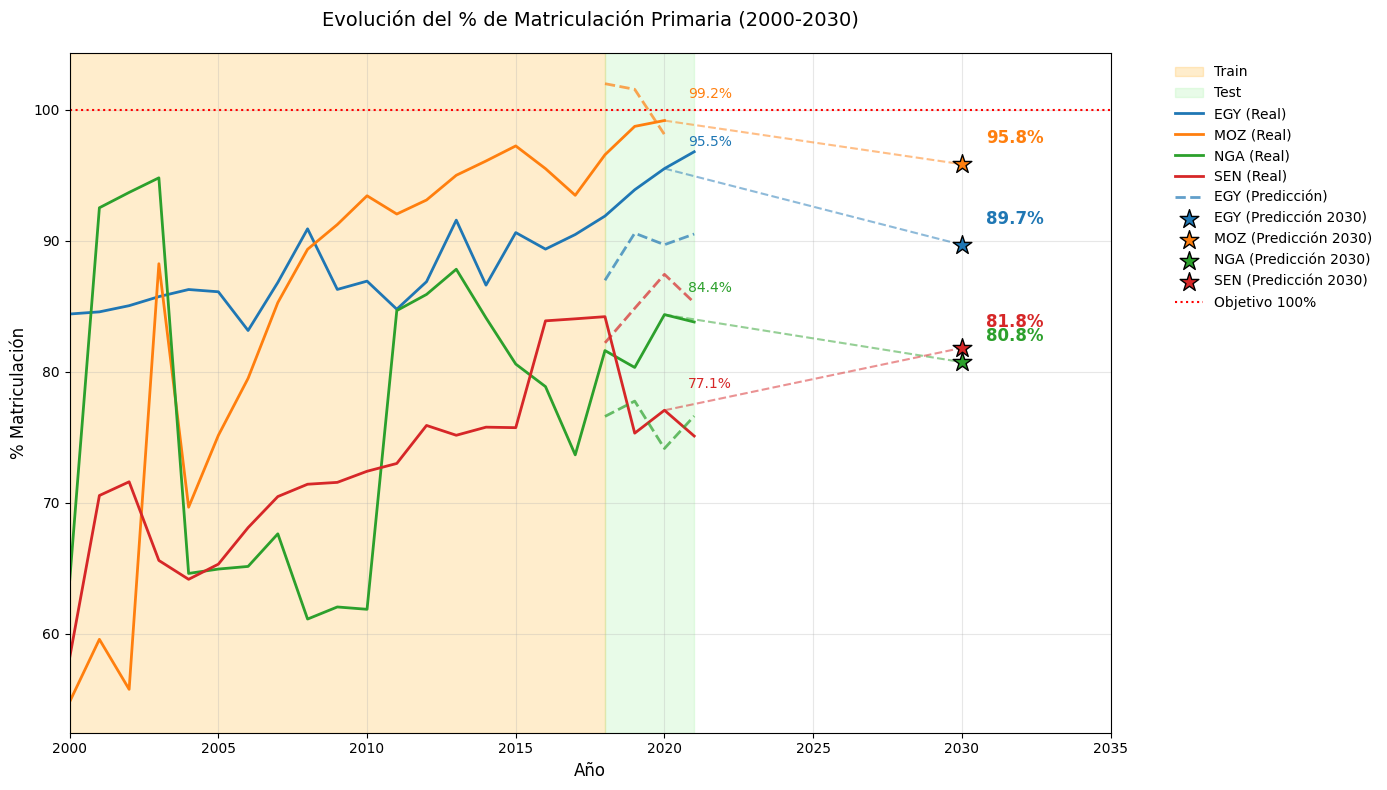

In [91]:
plt.figure(figsize=(14, 8))
x_offset = 0.8

colors = sns.color_palette("tab10", len(paises))
ax = plt.gca() 
ax.axvspan(2000, 2018, color='orange', alpha=0.2, label='Train')
ax.axvspan(2018, 2021, color='lightgreen', alpha=0.2, label='Test')

# Datos históricos (2000-2020)
for i, pais in enumerate(paises):
    df_pais = df_model[df_model['geoUnit'] == pais]
    plt.plot(df_pais['year'], 
             df_pais[target], 
             color=colors[i],
             linestyle='-',
             linewidth=2,
             markersize=8,
             label=f'{pais} (Real)')
    
# Predicciones en test
for i, pais in enumerate(paises):
    test_years = resultados_regl_df[resultados_regl_df['País'] == pais]['Test_years'].iloc[0]
    y_pred = resultados_regl_df[resultados_regl_df['País'] == pais]['Y_pred_test'].iloc[0]
    
    plt.plot(test_years, y_pred,
             color=colors[i], linestyle='--', linewidth=2,
             alpha=0.7, label=f'{pais} (Predicción)' if i == 0 else "")

# Proyecciones 2030 (destacadas con estrellas)
for i, pais in enumerate(paises):
    pred_2030 = resultados_rf_df[resultados_rf_df['País'] == pais]['Predicción 2030 (%)'].values[0]
    plt.scatter(2030, 
                pred_2030, 
                color=colors[i],
                marker='*', 
                s=200,
                edgecolor='black',
                linewidth=1,
                zorder=10,
                label=f'{pais} (Predicción 2030)')

# Líneas de conexión (2020 → 2030)
for i, pais in enumerate(paises):
    valor_2020 = resultados_rf_df[resultados_rf_df['País'] == pais]['Valor 2020 (%)'].values[0]
    pred_2030 = resultados_rf_df[resultados_rf_df['País'] == pais]['Predicción 2030 (%)'].values[0]
    plt.plot([2020, 2030], 
             [valor_2020, pred_2030], 
             color=colors[i],
             linestyle='--',
             alpha=0.5)


plt.axhline(100, color='red', linestyle=':', label='Objetivo 100%')
plt.title('Evolución del % de Matriculación Primaria (2000-2030)', fontsize=14, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('% Matriculación', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), frameon=False)
plt.grid(True, alpha=0.3)
plt.xlim(2000, 2035)

# Etiquetas de valores en 2020 y 2030
for i, pais in enumerate(paises):
    # Etiqueta 2020
    valor_2020 = resultados_rf_df[resultados_rf_df['País'] == pais]['Valor 2020 (%)'].values[0]
    plt.text(2020 + x_offset, valor_2020 + 2, f'{valor_2020:.1f}%', ha='left', va='center',
            color=colors[i], fontsize=10)
    
    # Etiqueta 2030
    pred_2030 = resultados_rf_df[resultados_rf_df['País'] == pais]['Predicción 2030 (%)'].values[0]
    plt.text(2030 + x_offset, pred_2030 + 2, f'{pred_2030:.1f}%', 
             ha='left', va='center', color=colors[i], fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

## EVALUACIÓN DE LOS MODELOS

Para representar los resultados de los diferentes modelos de forma comparativa en un mismo gráfico, vamos a hacer un concat de los 3 df de resultados. Antes creamos una columna con el nombre de cada modelo. 

In [92]:
resultados_arbol_df['Modelo'] = 'Decision Tree'
resultados_rf_df['Modelo'] = 'Random Forest'
resultados_regl_df['Modelo'] = 'Regresión Lineal'

df_model_comp = pd.concat([resultados_arbol_df, resultados_rf_df, resultados_regl_df], ignore_index=True)

df_model_comp

,País,Predicción 2030 (%),Valor 2020 (%),Y_pred_test,Test_years,R² (test),Modelo
0,EGY,89.64,95.52,"[89.63853963970746, 89.63853963970746, 89.6385...","[2019, 2020, 2021]",-23.59,Decision Tree
1,MOZ,95.96,99.18,"[95.96424102783203, 95.96424102783203]","[2019, 2020]",-179.52,Decision Tree
2,NGA,83.38,84.37,"[83.37902800744148, 83.37902800744148, 83.3790...","[2019, 2020, 2021]",-0.09,Decision Tree
3,SEN,79.25,77.07,"[79.25282016768189, 79.25282016768189, 79.2528...","[2019, 2020, 2021]",-15.06,Decision Tree
4,EGY,89.70,95.52,"[89.20996821979045, 89.29133313089477, 88.6329...","[2019, 2020, 2021]",-29.13,Random Forest
5,MOZ,95.85,99.18,"[95.853449082926, 95.26001396075397]","[2019, 2020]",-236.09,Random Forest
6,NGA,80.75,84.37,"[80.87472952560738, 80.27806426362616, 81.1838...","[2019, 2020, 2021]",-1.51,Random Forest
7,SEN,81.83,77.07,"[80.4158814633346, 79.76497864544906, 82.46632...","[2019, 2020, 2021]",-36.54,Random Forest
8,EGY,98.83,95.52,"[86.99188358173369, 90.58688937953195, 89.7071...","[2018, 2019, 2020, 2021]",-7.03,Regresión Lineal
9,MOZ,128.58,99.18,"[101.99511262310287, 101.56366341659104, 98.11...","[2018, 2019, 2020]",-8.87,Regresión Lineal


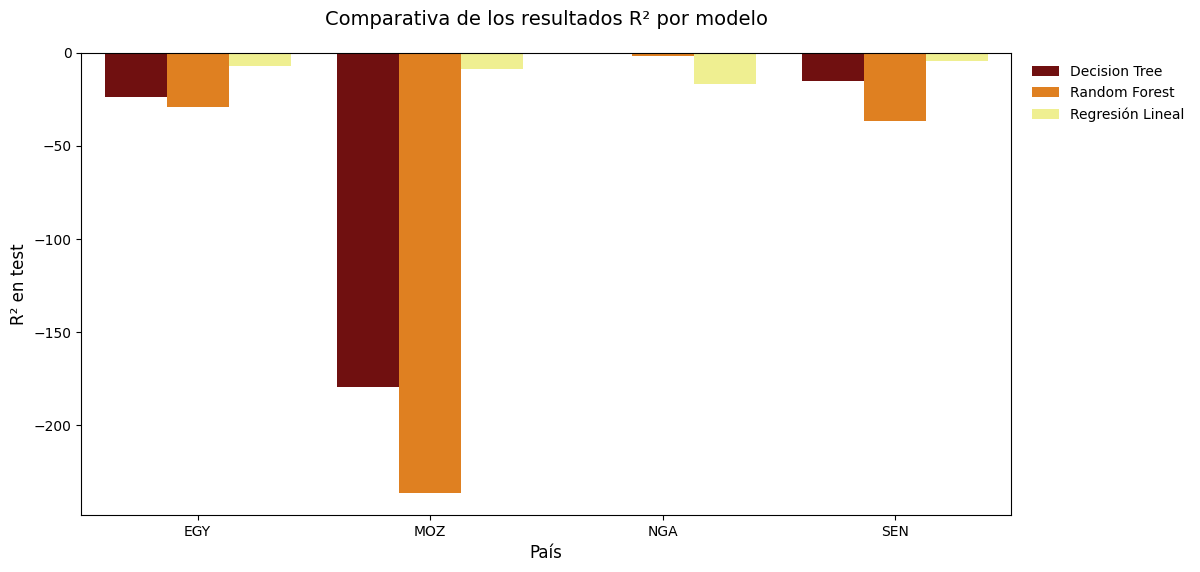

In [116]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_model_comp, x='País', y='R² (test)', hue='Modelo', palette='afmhot', errorbar=None)
plt.title('Comparativa de los resultados R² por modelo', fontsize=14, pad=20)
plt.xlabel('País', fontsize=12)
plt.ylabel('R² en test', fontsize=12)
plt.legend(bbox_to_anchor=(1.2, 1), frameon=False)